This project is to identify the attributes/characteristics that have high tendency of carring out fraudulent credit card transactions based on the dataset collected.

The hypothesis is that some of the demographic factors play an important clues to classify card users into differnt risk level of credit card default groupings.

Dataset Information:
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005
The target column is the 'default.payment.next.month'

There are 25 variables:
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import json
from math import log
from sklearn.datasets import load_boston

%matplotlib inline

In [396]:
Credit= pd.read_csv('/Users/kaiengwee/Documents/GitHub/GA18Aug/Project4/UCI_Credit_Card.csv')
Credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [397]:
Credit.rename(columns={'default.payment.next.month':'default_nextMTH'},inplace= True)

In [398]:
Credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nextMTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [399]:
Credit['default_nextMTH'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_nextMTH, dtype: float64

In [400]:
Credit.shape

(30000, 25)

In [401]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                 30000 non-null int64
LIMIT_BAL          30000 non-null float64
SEX                30000 non-null int64
EDUCATION          30000 non-null int64
MARRIAGE           30000 non-null int64
AGE                30000 non-null int64
PAY_0              30000 non-null int64
PAY_2              30000 non-null int64
PAY_3              30000 non-null int64
PAY_4              30000 non-null int64
PAY_5              30000 non-null int64
PAY_6              30000 non-null int64
BILL_AMT1          30000 non-null float64
BILL_AMT2          30000 non-null float64
BILL_AMT3          30000 non-null float64
BILL_AMT4          30000 non-null float64
BILL_AMT5          30000 non-null float64
BILL_AMT6          30000 non-null float64
PAY_AMT1           30000 non-null float64
PAY_AMT2           30000 non-null float64
PAY_AMT3           30000 non-null float64
PAY_AMT4           30000 non-nu

In [402]:
Credit.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [403]:
Credit.isna().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [404]:
Credit.nunique()

ID                 30000
LIMIT_BAL             81
SEX                    2
EDUCATION              7
MARRIAGE               4
AGE                   56
PAY_0                 11
PAY_2                 11
PAY_3                 11
PAY_4                 11
PAY_5                 10
PAY_6                 10
BILL_AMT1          22723
BILL_AMT2          22346
BILL_AMT3          22026
BILL_AMT4          21548
BILL_AMT5          21010
BILL_AMT6          20604
PAY_AMT1            7943
PAY_AMT2            7899
PAY_AMT3            7518
PAY_AMT4            6937
PAY_AMT5            6897
PAY_AMT6            6939
default_nextMTH        2
dtype: int64

No default in next month: 23364
Default in next month: 6636
Proportion of default cases in the dataset: 0.28 : 1


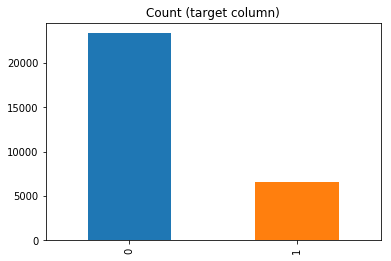

In [405]:

target_count = Credit['default_nextMTH'].value_counts()
print('No default in next month:', target_count[0])
print('Default in next month:', target_count[1])
print('Proportion of default cases in the dataset:', round(target_count[1] / target_count[0], 2), ': 1')

target_count.plot(kind='bar', title='Count (target column)');


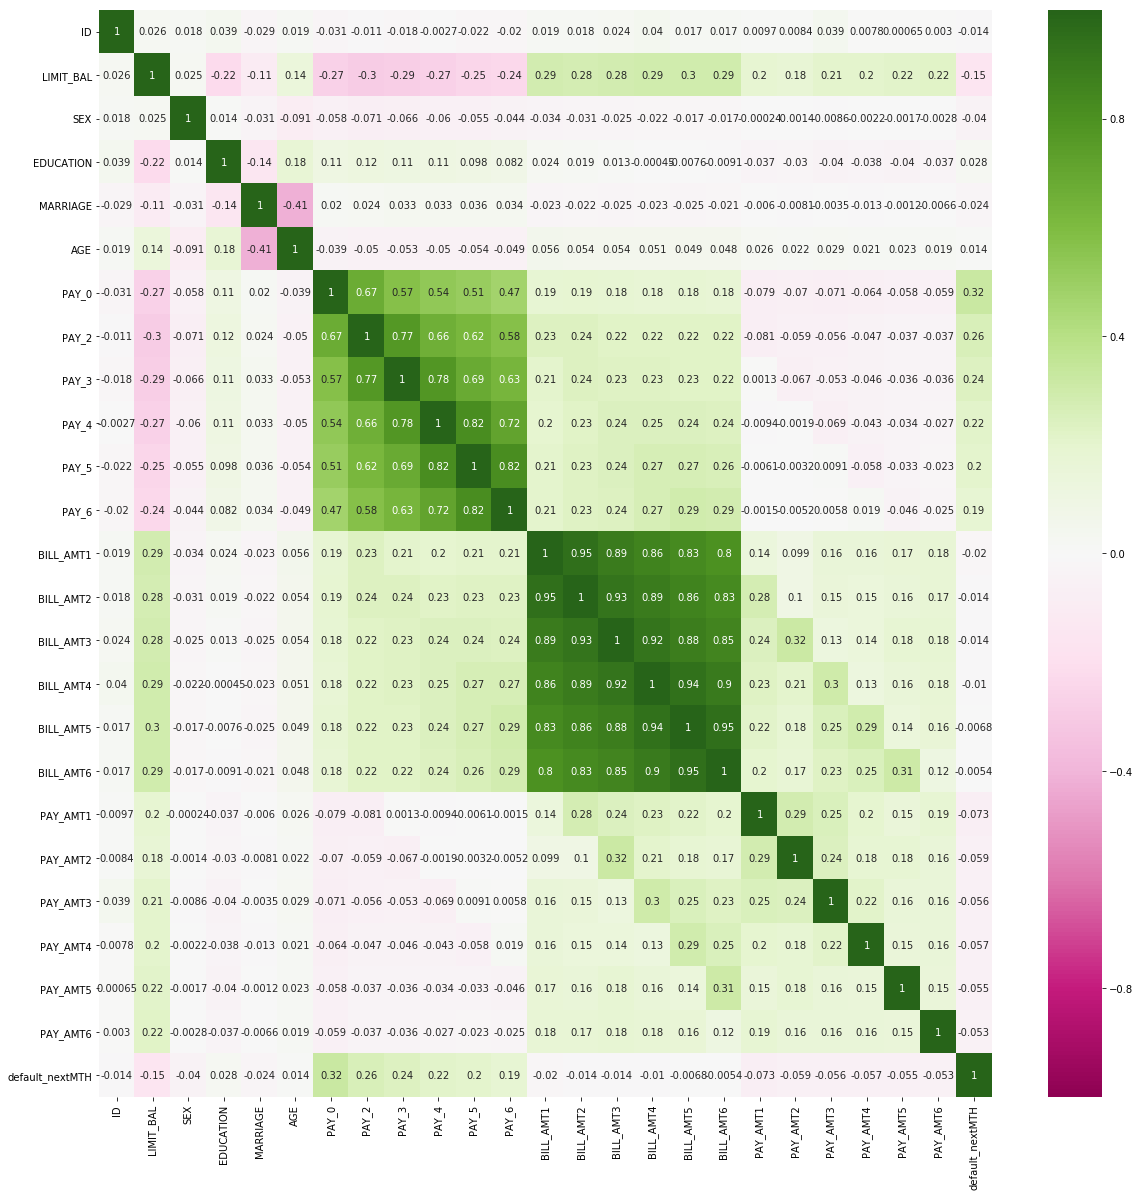

In [406]:
plt.subplots(figsize=(20,20))
sns.heatmap(Credit.corr(),  annot=True, vmin=-1, vmax= 1, cmap='PiYG', center= 0)

From the heatmap above, BILL_AMT1 to BILL_AMT6 are highly correlated within themselves. Since BILL_AMT1 is the 
latest billing month before default occured, I will drop out BILL_AMT2 to BILL_AMT6. In addition, ID and AGE features will 
also be removed since it doesn't mean anything in predicting the default occurence and lower correlated to the target.

In [407]:
Credit.drop(['ID','AGE','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis = 1, inplace = True)

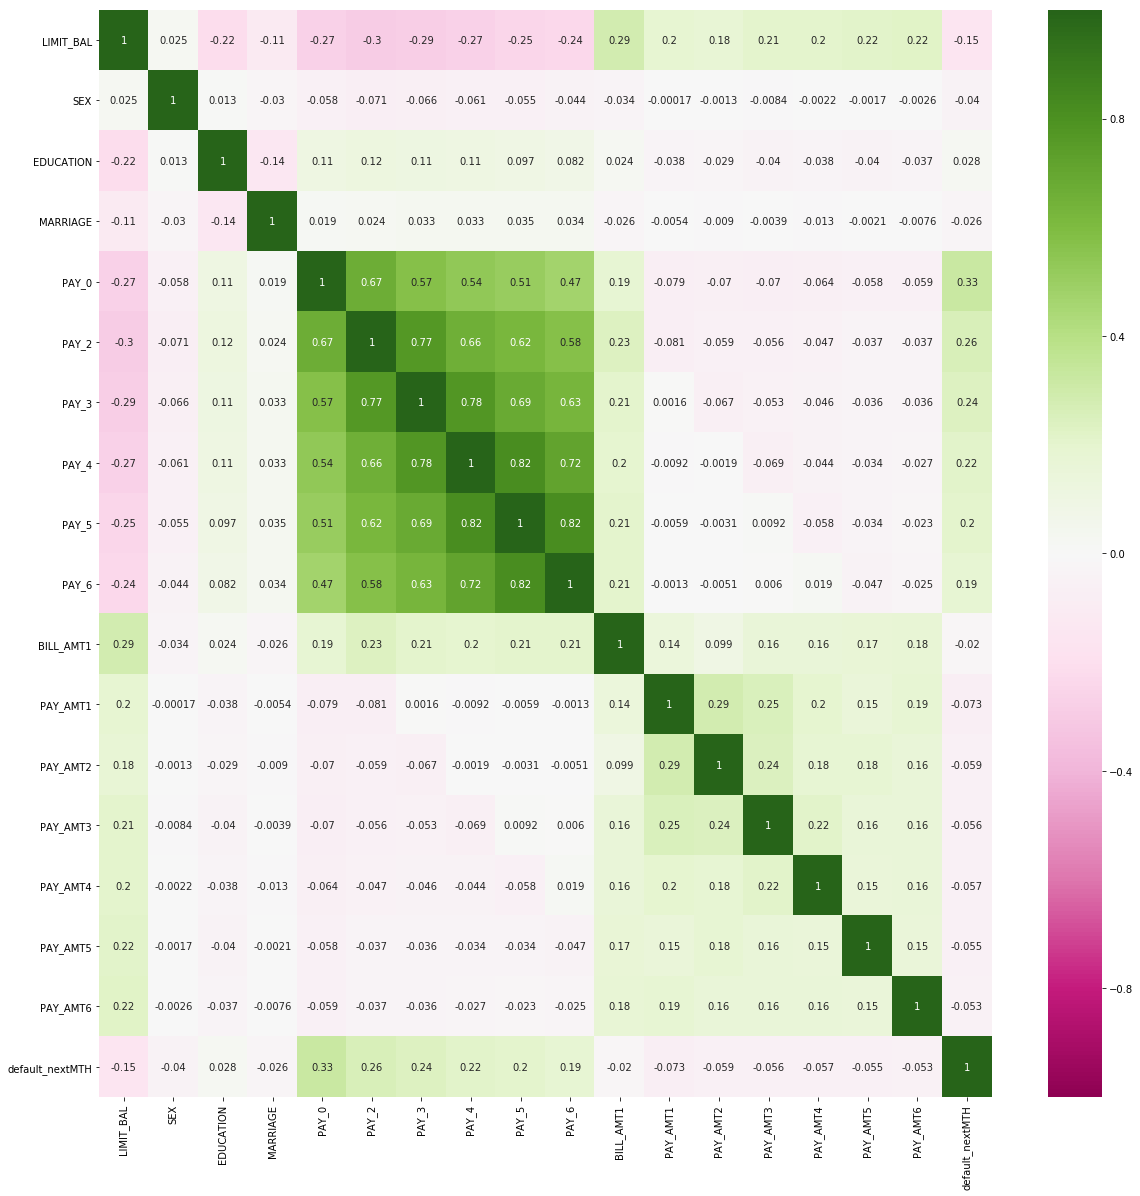

In [464]:
plt.subplots(figsize=(20,20))
sns.heatmap(Credit.corr(),  annot=True, vmin=-1, vmax= 1, cmap='PiYG', center= 0)

In [465]:
count_d = 0
count_nd = 0

for i in Credit['default_nextMTH']:
    if i == 1:
        count_d += 1
    else:
        count_nd += 1
    
total= count_d + count_nd
print("Total cases under study", total)
print("Total default cases", count_d,"or ", round(count_d/total,2)*100,"%" )
print("Total non-default cases", count_nd,"or ", round(count_nd/total,2)*100,"%" )

Total cases under study 29932
Total default cases 6631 or  22.0 %
Total non-default cases 23301 or  78.0 %


In [466]:
# The remaining features have 18 columns
Credit.shape

(29932, 18)

In [467]:
Credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nextMTH
0,20000.0,2,2.0,1.0,2,2,-1,-1,-2,-2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2.0,2.0,-1,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2.0,2.0,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2.0,1.0,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2.0,1.0,-1,0,-1,0,0,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [468]:
# SEX: Gender (1=male, 2=female), the data set in SEX column only has either male or female
Credit['SEX'].value_counts().sort_index()

1    11866
2    18066
Name: SEX, dtype: int64

In [469]:
SEX_dummies= pd.get_dummies(Credit.SEX, prefix= 'SEX')
SEX_dummies.sample(n=5, random_state=1)

,SEX_1,SEX_2
8429,1,0
24299,1,0
8732,0,1
528,1,0
21241,1,0


In [470]:
# Drop SEX_2 since one column is enough to represent the two genders

SEX_dummies.drop(SEX_dummies.columns[-1], axis=1, inplace= True)
SEX_dummies.head()

,SEX_1
0,0
1,0
2,0
3,0
4,1


In [471]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# value counts shows there is redundant categories under EDUCATION column i.e. categories 0, and 6
Credit['EDUCATION'].value_counts().sort_index()

1.0    10581
2.0    14024
3.0     4873
4.0      123
5.0      280
6.0       51
Name: EDUCATION, dtype: int64

In [472]:
# to replace the category 0 with NA

Credit.EDUCATION.replace(0, np.nan, inplace=True)
Credit.isna().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [473]:
# Remove the rows with NA

Credit.dropna(inplace=True)

In [474]:
# Check the column EDUCATION after removing the rows with NA

Credit['EDUCATION'].value_counts().sort_index()

1.0    10581
2.0    14024
3.0     4873
4.0      123
5.0      280
6.0       51
Name: EDUCATION, dtype: int64

In [475]:
# Create EDUCATION DUMMY COLUMNS

EDUCATION_dummies= pd.get_dummies(Credit.EDUCATION, prefix= 'EDUCATION')
EDUCATION_dummies.sample(n=5, random_state=1)

,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0
8429,0,0,1,0,0,0
24299,0,1,0,0,0,0
8732,0,0,1,0,0,0
528,1,0,0,0,0,0
21241,0,0,1,0,0,0


In [476]:
# Drop EDUCATION_0 & EDUCATION_6, columns with unknown
# Drop EDUCATION_5 since EDUCATION 1, 2, 3, and 4 columns are enough to represent all categories of EDUCATION

EDUCATION_dummies.drop(['EDUCATION_5.0','EDUCATION_6.0'], axis=1, inplace= True)
EDUCATION_dummies.head()

,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [477]:
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# value counts shows there is redundant categories under MARRIAGE column i.e. categories 0

Credit['MARRIAGE'].value_counts().sort_index()

1.0    13655
2.0    15954
3.0      323
Name: MARRIAGE, dtype: int64

In [478]:
# to replace the category 0 with NA

Credit.MARRIAGE.replace(0, np.nan, inplace=True)
Credit.isna().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [479]:
# Remove the rows with NA

Credit.dropna(inplace=True)

In [480]:
# Check the column MARRIAGE after removing the rows with NA

Credit['MARRIAGE'].value_counts().sort_index()

1.0    13655
2.0    15954
3.0      323
Name: MARRIAGE, dtype: int64

In [481]:
MARRIAGE_dummies= pd.get_dummies(Credit.MARRIAGE, prefix= 'MARRIAGE')
MARRIAGE_dummies.sample(n=5, random_state=1)

,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
8429,1,0,0
24299,0,1,0
8732,1,0,0
528,0,1,0
21241,1,0,0


In [482]:
# Drop MARRIAGE_3 since MARRIAGE 1 and 2 are enough to represent all categories of EDUCATION

MARRIAGE_dummies.drop(MARRIAGE_dummies.columns[-1], axis=1, inplace= True)
MARRIAGE_dummies.head()

,MARRIAGE_1.0,MARRIAGE_2.0
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [483]:
# Check if the dataset Credit are clear from cell with NA

Credit.isna().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [484]:
# the latest shape of data set Credit has lower number of rows at 29932

Credit.shape

(29932, 18)

In [485]:
# Concatenate the Credit with three sets of dummies created namely SEX, EDUCATION and MARRIAGE

Credit_dummies= pd.concat([Credit, SEX_dummies, EDUCATION_dummies, MARRIAGE_dummies], axis=1)
Credit_dummies.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,default_nextMTH,SEX_1,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_1.0,MARRIAGE_2.0
0,20000.0,2,2.0,1.0,2,2,-1,-1,-2,-2,...,0.0,0.0,1,0,0,1,0,0,1,0
1,120000.0,2,2.0,2.0,-1,2,0,0,0,2,...,0.0,2000.0,1,0,0,1,0,0,0,1
2,90000.0,2,2.0,2.0,0,0,0,0,0,0,...,1000.0,5000.0,0,0,0,1,0,0,0,1
3,50000.0,2,2.0,1.0,0,0,0,0,0,0,...,1069.0,1000.0,0,0,0,1,0,0,1,0
4,50000.0,1,2.0,1.0,-1,0,-1,0,0,0,...,689.0,679.0,0,1,0,1,0,0,1,0


In [486]:
# Remove the origianl columns for SEX, EDUCATION and MARRIAGE

Credit_dummies.drop(['SEX','EDUCATION','MARRIAGE'], axis = 1, inplace = True)

In [487]:
# Shift the target column ('default_nextMTH') to the last column

y= Credit_dummies.default_nextMTH
Credit_dummies.drop(['default_nextMTH'], axis=1, inplace= True)
Credit_dummies= pd.concat([Credit_dummies, y], axis=1)

In [488]:
# Show the columns in data set named as Credit_dummies

Credit_dummies.columns

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'SEX_1', 'EDUCATION_1.0', 'EDUCATION_2.0', 'EDUCATION_3.0',
       'EDUCATION_4.0', 'MARRIAGE_1.0', 'MARRIAGE_2.0', 'default_nextMTH'],
      dtype='object')

In [489]:
# Check the shape of Credit_dummies after added the three dummy columns

Credit_dummies.shape

(29932, 22)

In [490]:
# Create feature matrix (X)
feature_cols= Credit_dummies.columns.drop(['default_nextMTH'])
X= Credit_dummies[feature_cols]

# Create response vector (y)

y= Credit_dummies.default_nextMTH

In [491]:
print((type(X)))
print((type(X.values)))
print((type(y)))
print((type(y.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [492]:
print((X.shape))
print((y.shape))

(29932, 21)
(29932,)


In [493]:
# check if Credit_dummies contain any NA cell

Credit_dummies.isna().sum()

LIMIT_BAL          0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
SEX_1              0
EDUCATION_1.0      0
EDUCATION_2.0      0
EDUCATION_3.0      0
EDUCATION_4.0      0
MARRIAGE_1.0       0
MARRIAGE_2.0       0
default_nextMTH    0
dtype: int64

In [494]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pred = scaler.fit_transform(X)

Split data set for Train and Test sets using Logistic Regression and check their accuracies

In [607]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print('Testing score: '  + str(logreg.score(X_test, y_test)))
print('Training score: '  + str(logreg.score(X_train, y_train)))
list(zip(feature_cols, Random.feature_importances_)) 

Testing score: 0.5208056073107976
Training score: 0.5259811315174637


[('LIMIT_BAL', 0.015359482075818281),
 ('PAY_0', 0.16601459171490404),
 ('PAY_2', 0.11794825595840527),
 ('PAY_3', 0.046631479321958595),
 ('PAY_4', 0.07873862529296571),
 ('PAY_5', 0.05934359820268007),
 ('PAY_6', 0.031042244798203212),
 ('BILL_AMT1', 0.03381596208883584),
 ('PAY_AMT1', 0.02694909029068407),
 ('PAY_AMT2', 0.014007801597183508),
 ('PAY_AMT3', 0.018541681190296956),
 ('PAY_AMT4', 0.014152341457041463),
 ('PAY_AMT5', 0.00867628144627433),
 ('PAY_AMT6', 0.014994159844403276),
 ('SEX_1', 0.11546645965423534),
 ('EDUCATION_1.0', 0.024123492335079988),
 ('EDUCATION_2.0', 0.03763350390793816),
 ('EDUCATION_3.0', 0.017724740206991257),
 ('EDUCATION_4.0', 0.00015034871581432726),
 ('MARRIAGE_1.0', 0.08441340716657456),
 ('MARRIAGE_2.0', 0.07427245273371175)]

The Training and Testing scores are almost equal to the mix of none default cases in the data set. 

In [608]:
print(logreg.intercept_)
print(logreg.coef_)
coeff = pd.DataFrame(dict(zip(X.columns,model.coef_[0])),index=[0])
coeff

[1.78444948e-08]
[[-8.34431397e-07  7.64702619e-08  5.85468191e-08  5.14315033e-08
   4.48577166e-08  4.04078914e-08  3.72609966e-08  3.09566516e-06
  -1.65677691e-05 -9.94266733e-06 -8.54778383e-06 -7.68423566e-06
  -6.36080929e-06 -4.49046558e-06  1.15967644e-08  2.28618282e-09
   1.08244968e-08  5.71155414e-09 -2.86773403e-10  1.19659536e-08
   5.39491160e-09]]


,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_1.0,MARRIAGE_2.0
0,-8.344314e-07,7.647026e-08,5.854682e-08,5.143150e-08,4.485772e-08,4.040789e-08,3.726100e-08,0.000003,-0.000017,-0.00001,...,-0.000008,-0.000006,-0.000004,1.159676e-08,2.286183e-09,1.082450e-08,5.711554e-09,-2.867734e-10,1.196595e-08,5.394912e-09


In [496]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [497]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,5848,0
Actual: Yes,1635,0


In [498]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88      5848
          1       0.00      0.00      0.00      1635

avg / total       0.61      0.78      0.69      7483



/Users/kaiengwee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The classification report simply shows the model can only predict on actual data set

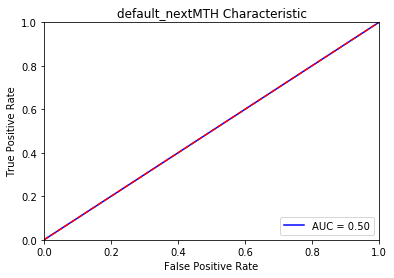

In [499]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('default_nextMTH Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Using another sklearn linear model to train and test the model

In [507]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.25, random_state=46)
logit_simple = linear_model.LogisticRegression(C=1e9).fit(X_train, y_train)

In [508]:
1- y_train.mean()

0.7784311105171723

In [509]:
# What is our accuracy on the test set?
print(np.mean(y_test == logit_simple.predict(X_test)))

0.7785647467593211


In [510]:
# Get probability predictions.
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

In [511]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

array([[5826,    0],
       [1657,    0]])

This sklearn linear model is built on logistic regression and hence, is showing the same accuracy at 78%

Apply RandomForest to get model accuracy

In [605]:
from sklearn.ensemble import RandomForestClassifier

# Train model
Random = RandomForestClassifier(n_estimators=10, max_depth= 10)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model= Random.fit(X_train,y_train)
 
# Predict on training set
y_pred = Random.predict(X_test)
 
print('Testing score: '  + str(Random.score(X_test, y_test)))
print('Training score: '  + str(Random.score(X_train, y_train)))
list(zip(feature_cols, Random.feature_importances_)) 

Testing score: 0.8655842427468725
Training score: 0.8852808091562416


[('LIMIT_BAL', 0.015359482075818281),
 ('PAY_0', 0.16601459171490404),
 ('PAY_2', 0.11794825595840527),
 ('PAY_3', 0.046631479321958595),
 ('PAY_4', 0.07873862529296571),
 ('PAY_5', 0.05934359820268007),
 ('PAY_6', 0.031042244798203212),
 ('BILL_AMT1', 0.03381596208883584),
 ('PAY_AMT1', 0.02694909029068407),
 ('PAY_AMT2', 0.014007801597183508),
 ('PAY_AMT3', 0.018541681190296956),
 ('PAY_AMT4', 0.014152341457041463),
 ('PAY_AMT5', 0.00867628144627433),
 ('PAY_AMT6', 0.014994159844403276),
 ('SEX_1', 0.11546645965423534),
 ('EDUCATION_1.0', 0.024123492335079988),
 ('EDUCATION_2.0', 0.03763350390793816),
 ('EDUCATION_3.0', 0.017724740206991257),
 ('EDUCATION_4.0', 0.00015034871581432726),
 ('MARRIAGE_1.0', 0.08441340716657456),
 ('MARRIAGE_2.0', 0.07427245273371175)]

The feature importance check does not show any particular feature having significant importance, in other words, the features 
are having similar weights on the target column. 
The most importance featur is PAY_0 which makes sense as this is the latest bill payment. The least important feature
is EDUCATION category 4, because of data availability issue.
Random forest can work better with categorical features, than logistic regression.

Check the test data set accuracy using roc auc curve after modeled by Random forest

In [528]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [529]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,5588,260
Actual: Yes,1037,598


In [530]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.96      0.90      5848
          1       0.70      0.37      0.48      1635

avg / total       0.81      0.83      0.81      7483



The Precision is good but the recall is very low for Class 1 (default class) because the data set is imbalanced
In other words, the model is only good in predicting none default case only.

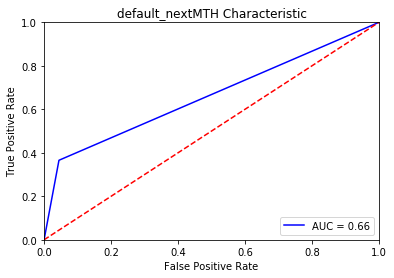

In [532]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('default_nextMTH Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Apply Smote Tomek on imbalanced dataset

Automatically created module for IPython interactive environment


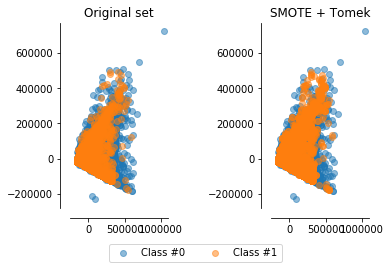

In [553]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTETomek

print(__doc__)

X= Credit_dummies[feature_cols]
y= Credit_dummies.default_nextMTH

# Generate the dataset
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.22, 0.78],
                           #n_informative=3, n_redundant=1, flip_y=0,
                           #n_features=18, n_clusters_per_class=1,
                           #n_samples=30000, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components= 2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply SMOTE + Tomek links
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + Tomek')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    #ax.set_xlim([-6, 8])
    #ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()



In [561]:
# To check the level of imbalanced data set after Smote Tomek application:
# The results show the Smote Tomek function has actually increased the minority and achive a balanced data set

count_d = 0
count_nd = 0

for i in y_resampled:
    if i == 1:
        count_d += 1
    else:
        count_nd += 1
    
total= count_d + count_nd
print("Total cases under study", total)
print("Total default cases", count_d,"or ", round(count_d/total,2)*100,"%" )
print("Total non-default cases", count_nd,"or ", round(count_nd/total,2)*100,"%" )

Total cases under study 45084
Total default cases 22542 or  50.0 %
Total non-default cases 22542 or  50.0 %


In [562]:
# Create a new dataframe for all the columns after the Credit_dummies data set was treated by Smote Tomek 

X= pd.DataFrame(X_resampled)
y= pd.DataFrame(y_resampled)
Credit_ST= pd.concat([X, y], axis= 1)
Credit_ST.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,0
0,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,0.0,689.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,120000.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,0.0,1000.0,...,0.0,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,1518.0,1500.0,...,1000.0,5000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,2000.0,2019.0,...,1069.0,1000.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,2000.0,36681.0,...,689.0,679.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [563]:
# Call out the headers of Credit_dummies to compare aginst the headers of X_resampled

Credit_dummies.head(1)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_1.0,MARRIAGE_2.0,default_nextMTH
0,20000.0,2,2,-1,-1,-2,-2,3913.0,0.0,689.0,...,0.0,0.0,0,0,1,0,0,1,0,1


In [564]:
# Put headers of Credit_dummies.columns onto X_resampled and y_resampled

initialcol = Credit_dummies.columns
Credit_ST.columns = initialcol

In [565]:
Credit_ST.head(1)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_1.0,MARRIAGE_2.0,default_nextMTH
0,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,0.0,689.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [583]:
# Create feature matrix X from the columns treated by Smote Tomek
feature_cols= Credit_ST.columns.drop(['default_nextMTH'])
X= Credit_ST[feature_cols]

# Create response vector (y)

y= Credit_ST.default_nextMTH

In [584]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pred = scaler.fit_transform(X)

The Credit_dummies data set has been treated by Smote Tomek. Use Logistic Regression to check their accuracies

In [604]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print('Testing score: '  + str(logreg.score(X_test, y_test)))
print('Training score: '  + str(logreg.score(X_train, y_train)))
list(zip(feature_cols, Random.feature_importances_)) 

Testing score: 0.5208056073107976
Training score: 0.5259811315174637


[('LIMIT_BAL', 0.025116395823053327),
 ('PAY_0', 0.24164665401773858),
 ('PAY_2', 0.08209904313061905),
 ('PAY_3', 0.09569148870538527),
 ('PAY_4', 0.019646344982997065),
 ('PAY_5', 0.0393364029305958),
 ('PAY_6', 0.018205402360644326),
 ('BILL_AMT1', 0.037623433178224565),
 ('PAY_AMT1', 0.02492461927510558),
 ('PAY_AMT2', 0.023359850996501307),
 ('PAY_AMT3', 0.022761332061888614),
 ('PAY_AMT4', 0.02235054740387796),
 ('PAY_AMT5', 0.01657098433068757),
 ('PAY_AMT6', 0.01658499240397083),
 ('SEX_1', 0.0412550379180099),
 ('EDUCATION_1.0', 0.04213059481593446),
 ('EDUCATION_2.0', 0.06543662591304075),
 ('EDUCATION_3.0', 0.01591551659080239),
 ('EDUCATION_4.0', 0.00035638907178214124),
 ('MARRIAGE_1.0', 0.04335221082819424),
 ('MARRIAGE_2.0', 0.1056361332609463)]

The feature importance check does not show any particular feature having significant importance, in other words, 
the features are having similar weights on the target column.
The train and test scores at about 52% only shows slightly better accuracy than the 50%:50% data set after treated 
by Smote Tomek

In [586]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [587]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,4637,953
Actual: Yes,4448,1233


In [588]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.51      0.83      0.63      5590
          1       0.56      0.22      0.31      5681

avg / total       0.54      0.52      0.47     11271



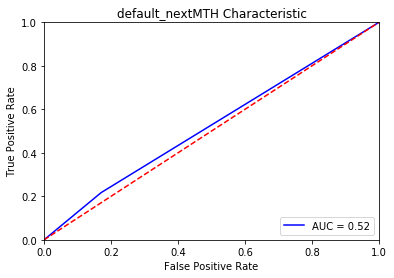

In [589]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('default_nextMTH Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Using another sklearn linear model to train and test the model

In [590]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.25, random_state=46)
logit_simple = linear_model.LogisticRegression(C=1e9).fit(X_train, y_train)

In [591]:
1- y_train.mean()

0.5032679738562091

In [592]:
# What is our accuracy on the test set?
print(np.mean(y_test == logit_simple.predict(X_test)))

0.517700292786798


In [593]:
# Get probability predictions.
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

In [594]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

array([[4673,  852],
       [4584, 1162]])

This sklearn linear model is built on logistic regression and hence, is showing the same accuracy at about 52%

Apply RandomForest to get model accuracy

In [603]:
from sklearn.ensemble import RandomForestClassifier

# Train model
Random = RandomForestClassifier(n_estimators=10, max_depth= 12)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model= Random.fit(X_train,y_train)
 
# Predict on training set
y_pred = Random.predict(X_test)
 
 
print('Testing score: '  + str(Random.score(X_test, y_test)))
print('Training score: '  + str(Random.score(X_train, y_train)))
list(zip(feature_cols, Random.feature_importances_))  

Testing score: 0.8654067962026439
Training score: 0.9021086564339159


[('LIMIT_BAL', 0.025116395823053327),
 ('PAY_0', 0.24164665401773858),
 ('PAY_2', 0.08209904313061905),
 ('PAY_3', 0.09569148870538527),
 ('PAY_4', 0.019646344982997065),
 ('PAY_5', 0.0393364029305958),
 ('PAY_6', 0.018205402360644326),
 ('BILL_AMT1', 0.037623433178224565),
 ('PAY_AMT1', 0.02492461927510558),
 ('PAY_AMT2', 0.023359850996501307),
 ('PAY_AMT3', 0.022761332061888614),
 ('PAY_AMT4', 0.02235054740387796),
 ('PAY_AMT5', 0.01657098433068757),
 ('PAY_AMT6', 0.01658499240397083),
 ('SEX_1', 0.0412550379180099),
 ('EDUCATION_1.0', 0.04213059481593446),
 ('EDUCATION_2.0', 0.06543662591304075),
 ('EDUCATION_3.0', 0.01591551659080239),
 ('EDUCATION_4.0', 0.00035638907178214124),
 ('MARRIAGE_1.0', 0.04335221082819424),
 ('MARRIAGE_2.0', 0.1056361332609463)]

The feature importance check does not show any particular feature having significant importance, in other words, the features 
are having similar weights on the target column. 
The most importance featur is PAY_0 which makes sense as this is the latest bill payment. The least important feature
is EDUCATION category 4, because of data availability issue.
Random forest can work better with categorical features, than logistic regression.

Check the test data set accuracy using confusion matric

In [596]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [597]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,5158,432
Actual: Yes,1070,4611


In [598]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.92      0.87      5590
          1       0.91      0.81      0.86      5681

avg / total       0.87      0.87      0.87     11271



The Precision and recall accuracies are good after the data set are treated by Smote Tomek and get to balanced
The Predictions on default (Positive) and no default (Negative) with correct outcomes are rather evenly distributed.

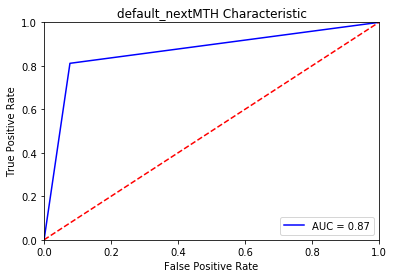

In [599]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('default_nextMTH Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The Precision and the recall are both very because the data set is now balanced.
In other words, the model is good in predicting both default and none default cases.

In [343]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
print(clf.predict([[-0.8, -1]]))

[1]


In [341]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)
                             

#array([ 1.     ,  0.93...,  0.86...,  0.93...,  0.93...,
        #0.93...,  0.93...,  1.     ,  0.93...,  1.      ])

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])